# Real Estate Project

## Problem Statement : 
The objective of this project is to create a python file that could be used to find insights that could diffrentiate any two cities across India (from the scraped dataset), to determine which city is more feasible for future construction or investment purposes. 

# Data Collection

In [1]:
#importing all the necessary libraries for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import itertools

import warnings
warnings.simplefilter("ignore")

from datetime import datetime
from datetime import date

import calendar

import re

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Scraping data from magicbricks.com

#Flat filter
prototypeF = 'Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment'
#Villa/House/Studio filter
prototypeV = 'Residential-House,Villa'

#City filter
City = ['Chennai','Mumbai']

Type = [prototypeF,prototypeV]

#creating list of tuples for every location and type of realestate
City_Type = list(itertools.product(City, Type,range(1,11)))



Details = []
Price = []
PriceperSqft = []
loc = []
bhk = []

for x,y,z in City_Type:
    start_time = time.time()
    
    url = 'https://www.magicbricks.com/property-for-sale/residential-real-estate?&proptype={}&cityName={}&page={}'.format(y,x,z)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    #Scraping BHK data
    BHK_data = soup.findAll('div',class_="m-srp-card__desc flex__item")
    
    for i in BHK_data:
        if i.find('div',class_="luxury-srp-card__pri-see") != None:
            continue
        else:
            bhk.append(i.find('div',class_="m-srp-card__heading clearfix").text)
    
    #Scraping details of Realestate
    RealEstate = soup.findAll('div', attrs = {'class': 'm-srp-card__summary js-collapse__content'})
    
    for i in RealEstate:
        
        RealEstate_info = i.findAll('div', attrs = {'class': 'm-srp-card__summary__info'})
        f = []
        for i in RealEstate_info:
            f.append(i.text)
        Details.append(f)
        loc.append(x)
    
    #Scraping price details of the realestate
    Price_Details = soup.findAll('div', attrs = {'class': 'm-srp-card__info flex__item'})
    
    for i in Price_Details:
        
        #Total Price
        Cost = i.find('div', attrs = {'class': 'm-srp-card__price'}) 
        if Cost is None:
            Price.append('')
        else:
            Price.append(Cost.text)
            
        #Price per Sqft
        CostperSqft = i.find('div', attrs = {'class': 'm-srp-card__area'}) 
        if CostperSqft is None:
            PriceperSqft.append('')
        else:
            PriceperSqft.append(CostperSqft.text)
            
        
    end_time = time.time()
    print('Location {} completed in {} seconds'.format(x, end_time - start_time))

Location Chennai completed in 1.251075029373169 seconds
Location Chennai completed in 1.7497761249542236 seconds
Location Chennai completed in 1.4376130104064941 seconds
Location Chennai completed in 1.0610549449920654 seconds
Location Chennai completed in 1.2953307628631592 seconds
Location Chennai completed in 1.5196788311004639 seconds
Location Chennai completed in 1.3596370220184326 seconds
Location Chennai completed in 1.284372091293335 seconds
Location Chennai completed in 1.4255831241607666 seconds
Location Chennai completed in 1.422928810119629 seconds
Location Chennai completed in 1.1197710037231445 seconds
Location Chennai completed in 1.0503830909729004 seconds
Location Chennai completed in 0.9628500938415527 seconds
Location Chennai completed in 1.1778340339660645 seconds
Location Chennai completed in 1.0529720783233643 seconds
Location Chennai completed in 1.1838347911834717 seconds
Location Chennai completed in 0.9198260307312012 seconds
Location Chennai completed in 0.92

In [3]:
#creating dataframe of scraped data
REs = pd.DataFrame({'Location':loc,'bhk_Type':bhk,'Details':Details,'Price':Price,'PriceperSqrt':PriceperSqft})
REs

,Location,bhk_Type,Details,Price,PriceperSqrt
0,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perambur\n\n\n,"[1100 sqft, \nPossession by Dec '21\n, New Pro...",₹ 90 Lac,₹ 8182 per sqft
1,Chennai,\n\n\n\n1 BHK Flat\n\nfor Sale\nin Thirumazhis...,"[544 sqft, \nPossession by Dec '23\n, New Prop...",₹ 29.7 Lac,₹ 5450 per sqft
2,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perumbakkam...,"[796 sqft, \nPossession by Sep '23\n, New Prop...",₹ 28.6 Lac,₹ 3599 per sqft
3,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Thalambur\n...,"[1026 sqft, \nPossession by Mar '24\n, New Pro...",₹ 48.5 Lac,₹ 4724 per sqft
4,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perungalath...,"[903 sqft, \nPossession by Jul '22\n, New Prop...",₹ 44 Lac,₹ 4877 per sqft
...,...,...,...,...,...
819,Mumbai,\n\n\n\n1 BHK House\n\nfor Sale in\nLink Road\...,"[150 sqft, Ready to Move, 1 out of 1 floor, Re...",₹ 27 Lac,
820,Mumbai,\n\n\n\n2 BHK House\n\nfor Sale in\nPANVEL\n\n\n,"[78 sqm, Ready to Move, 1 out of 5 floors, Res...",₹ 90 Lac,
821,Mumbai,\n\n\n\n2 BHK House\n\nfor Sale in\nNirmal Pol...,"[778 sqft, Ready to Move, 2 out of 20 floors, ...",₹ 1.80 Cr,
822,Mumbai,\n\n\n\n1 BHK House\n\nfor Sale in\nGhatkopar ...,"[10 sqft, Ready to Move, Resale, Freehold, Mai...",₹ 25 Lac,


In [4]:
print(len(Details))
print(len(Price))
print(len(PriceperSqft))
print(len(loc))
print(len(bhk))

824
824
824
824
824


In [5]:
#Converting list to string
REs.Details = REs.Details.apply(lambda x : ','.join(x))
REs.head()

,Location,bhk_Type,Details,Price,PriceperSqrt
0,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perambur\n\n\n,"1100 sqft,\nPossession by Dec '21\n,New Proper...",₹ 90 Lac,₹ 8182 per sqft
1,Chennai,\n\n\n\n1 BHK Flat\n\nfor Sale\nin Thirumazhis...,"544 sqft,\nPossession by Dec '23\n,New Propert...",₹ 29.7 Lac,₹ 5450 per sqft
2,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perumbakkam...,"796 sqft,\nPossession by Sep '23\n,New Propert...",₹ 28.6 Lac,₹ 3599 per sqft
3,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Thalambur\n...,"1026 sqft,\nPossession by Mar '24\n,New Proper...",₹ 48.5 Lac,₹ 4724 per sqft
4,Chennai,\n\n\n\n2 BHK Flat\n\nfor Sale\nin Perungalath...,"903 sqft,\nPossession by Jul '22\n,New Propert...",₹ 44 Lac,₹ 4877 per sqft


In [6]:
#Removing unnecessary characters from string
REs.bhk_Type = REs.bhk_Type.str.replace('\n','')

In [7]:
# Creating data columns from the scraped data

#Sqft data extraction
Sqft_regex = re.compile(r'[0-9\s]+sqft')
REs['Sqft'] = REs.Details.apply(lambda x : Sqft_regex.findall(x))

#Status data extraction
status_regex = re.compile(r'Possession[\s\w]+\W\d{2}')
REs['Status'] = REs.Details.apply(lambda x : status_regex.findall(x))

#Furnish Type data extraction
furnish_regex = re.compile(r'[\w]+furnish')
REs['Furnish'] = REs.Details.apply(lambda x : furnish_regex.findall(x))

#Covered Carpark data extraction
carpark_regex = re.compile(r'[\w\s]+Covered')
REs['Car_Park'] = REs.Details.apply(lambda x : carpark_regex.findall(x))

#No of Bathrooms data extraction
bathroom_regex = re.compile(r'\d$')
REs['Bathroom'] = REs.Details.apply(lambda x : bathroom_regex.findall(x))

#Transaction date data extraction
transaction_regex = re.compile(r'[\w\s]+Property')
REs['Transaction'] = REs.Details.apply(lambda x : transaction_regex.findall(x))

#No of BHK data extraction
bhk_regex = re.compile(r'\d{1,2}\s+BHK')
REs['BHK'] = REs.bhk_Type.apply(lambda x : bhk_regex.findall(x))

#Type of the real estate
type_regex = re.compile(r'(Flat|Villa)')
REs['Type'] = REs.bhk_Type.apply(lambda x : type_regex.findall(x))

#Location of the data
area_regex = re.compile(r'[^\W]+')
REs['Area'] = REs.bhk_Type.apply(lambda x : ' '.join(area_regex.findall(x)[4:]))


REs.head(10)

,Location,bhk_Type,Details,Price,PriceperSqrt,Sqft,Status,Furnish,Car_Park,Bathroom,Transaction,BHK,Type,Area
0,Chennai,2 BHK Flatfor Salein Perambur,"1100 sqft,\nPossession by Dec '21\n,New Proper...",₹ 90 Lac,₹ 8182 per sqft,[1100 sqft],[Possession by Dec '21],[Unfurnish],[1 Covered],[2],[New Property],[2 BHK],[Flat],Perambur
1,Chennai,1 BHK Flatfor Salein Thirumazhisai,"544 sqft,\nPossession by Dec '23\n,New Propert...",₹ 29.7 Lac,₹ 5450 per sqft,[544 sqft],[Possession by Dec '23],[Unfurnish],[1 Covered],[1],[New Property],[1 BHK],[Flat],Thirumazhisai
2,Chennai,2 BHK Flatfor Salein Perumbakkam,"796 sqft,\nPossession by Sep '23\n,New Propert...",₹ 28.6 Lac,₹ 3599 per sqft,[796 sqft],[Possession by Sep '23],[],[],[2],[New Property],[2 BHK],[Flat],Perumbakkam
3,Chennai,2 BHK Flatfor Salein Thalambur,"1026 sqft,\nPossession by Mar '24\n,New Proper...",₹ 48.5 Lac,₹ 4724 per sqft,[1026 sqft],[Possession by Mar '24],[Unfurnish],[],[2],[New Property],[2 BHK],[Flat],Thalambur
4,Chennai,"2 BHK Flatfor Salein Perungalathur, Chennai By...","903 sqft,\nPossession by Jul '22\n,New Propert...",₹ 44 Lac,₹ 4877 per sqft,[903 sqft],[Possession by Jul '22],[Unfurnish],[1 Covered],[2],[New Property],[2 BHK],[Flat],Perungalathur Chennai Bypass Road
5,Chennai,3 BHK Flatfor Salein Sembakkam,"1550 sqft,\nPossession by Jul '22\n,New Proper...",₹ 1.04 Cr,₹ 6749 per sqft,[1550 sqft],[Possession by Jul '22],[Unfurnish],[],[3],[New Property],[3 BHK],[Flat],Sembakkam
6,Chennai,2 BHK Flatfor Salein G S T Road,"1455 sqft,\nPossession by Dec '21\n,New Proper...",₹ 78.7 Lac,₹ 5407 per sqft,[1455 sqft],[Possession by Dec '21],[Unfurnish],[1 Covered],[2],[New Property],[2 BHK],[Flat],G S T Road
7,Chennai,2 BHK Flatfor Salein Tambaram East,"1004 sqft,\nPossession by Sep '22\n,New Proper...",₹ 71.3 Lac,₹ 7100 per sqft,[1004 sqft],[Possession by Sep '22],[Unfurnish],[1 Covered],[2],[New Property],[2 BHK],[Flat],Tambaram East
8,Chennai,3 BHK Flatfor Salein Medavakkam,"1280 sqft,\nPossession by Nov '22\n,New Proper...",₹ 90.2 Lac,₹ 7049 per sqft,[1280 sqft],[Possession by Nov '22],[Unfurnish],[1 Covered],[2],[New Property],[3 BHK],[Flat],Medavakkam
9,Chennai,"3 BHK Flatfor Salein Padur, Old Mahabalipuram ...","918 sqft,\nPossession by Mar '23\n,New Propert...",₹ 44.6 Lac,₹ 4855 per sqft,[918 sqft],[Possession by Mar '23],[Unfurnish],[],[2],[New Property],[3 BHK],[Flat],Padur Old Mahabalipuram Road


In [8]:
#Converting list to strings
REs.Sqft = REs.Sqft.apply(lambda x:''.join(x) if len(x)!=0 else '')
REs.Transaction = REs.Transaction.apply(lambda x:''.join(x) if len(x)!=0 else 'Old Property')
REs.Furnish = REs.Furnish.apply(lambda x:''.join(x) if len(x)!=0 else 'Furnish')
REs.Bathroom = REs.Bathroom.apply(lambda x:''.join(x))
REs.Car_Park = REs.Car_Park.apply(lambda x:''.join(x))
REs.Status = REs.Status.apply(lambda x:''.join(x) if len(x)!=0 else 'Ready to Move')
REs.BHK = REs.BHK.apply(lambda x: ''.join(x) if len(x)!=0 else '0 BHK')
REs.Type = REs.Type.apply(lambda x: ''.join(x))
REs.Area = REs.Area.apply(lambda x: x if len(x)!=0 else 'Unknown')

In [9]:
#Creating a dataframe in orderly fashion (more readable format)
REstate = REs[['Location','Area','Type','BHK','Sqft','Furnish','Car_Park','Bathroom','Transaction','Status','PriceperSqrt','Price' ]]
REstate

,Location,Area,Type,BHK,Sqft,Furnish,Car_Park,Bathroom,Transaction,Status,PriceperSqrt,Price
0,Chennai,Perambur,Flat,2 BHK,1100 sqft,Unfurnish,1 Covered,2,New Property,Possession by Dec '21,₹ 8182 per sqft,₹ 90 Lac
1,Chennai,Thirumazhisai,Flat,1 BHK,544 sqft,Unfurnish,1 Covered,1,New Property,Possession by Dec '23,₹ 5450 per sqft,₹ 29.7 Lac
2,Chennai,Perumbakkam,Flat,2 BHK,796 sqft,Furnish,,2,New Property,Possession by Sep '23,₹ 3599 per sqft,₹ 28.6 Lac
3,Chennai,Thalambur,Flat,2 BHK,1026 sqft,Unfurnish,,2,New Property,Possession by Mar '24,₹ 4724 per sqft,₹ 48.5 Lac
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2 BHK,903 sqft,Unfurnish,1 Covered,2,New Property,Possession by Jul '22,₹ 4877 per sqft,₹ 44 Lac
...,...,...,...,...,...,...,...,...,...,...,...,...
819,Mumbai,inLink Road,,1 BHK,150 sqft,Unfurnish,,,Old Property,Ready to Move,,₹ 27 Lac
820,Mumbai,inPANVEL,,2 BHK,,Unfurnish,,,Old Property,Ready to Move,,₹ 90 Lac
821,Mumbai,inNirmal Polaris Mulund West,,2 BHK,778 sqft,Furnish,,,Old Property,Ready to Move,,₹ 1.80 Cr
822,Mumbai,inGhatkopar West,,1 BHK,10 sqft,Unfurnish,,,Old Property,Ready to Move,,₹ 25 Lac


In [10]:
#Removing the 'CarPark' and 'Bathroom' columns as they have excess null values
REstate.drop(['Car_Park','Bathroom'],axis = 1,inplace = True)
REstate

,Location,Area,Type,BHK,Sqft,Furnish,Transaction,Status,PriceperSqrt,Price
0,Chennai,Perambur,Flat,2 BHK,1100 sqft,Unfurnish,New Property,Possession by Dec '21,₹ 8182 per sqft,₹ 90 Lac
1,Chennai,Thirumazhisai,Flat,1 BHK,544 sqft,Unfurnish,New Property,Possession by Dec '23,₹ 5450 per sqft,₹ 29.7 Lac
2,Chennai,Perumbakkam,Flat,2 BHK,796 sqft,Furnish,New Property,Possession by Sep '23,₹ 3599 per sqft,₹ 28.6 Lac
3,Chennai,Thalambur,Flat,2 BHK,1026 sqft,Unfurnish,New Property,Possession by Mar '24,₹ 4724 per sqft,₹ 48.5 Lac
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2 BHK,903 sqft,Unfurnish,New Property,Possession by Jul '22,₹ 4877 per sqft,₹ 44 Lac
...,...,...,...,...,...,...,...,...,...,...
819,Mumbai,inLink Road,,1 BHK,150 sqft,Unfurnish,Old Property,Ready to Move,,₹ 27 Lac
820,Mumbai,inPANVEL,,2 BHK,,Unfurnish,Old Property,Ready to Move,,₹ 90 Lac
821,Mumbai,inNirmal Polaris Mulund West,,2 BHK,778 sqft,Furnish,Old Property,Ready to Move,,₹ 1.80 Cr
822,Mumbai,inGhatkopar West,,1 BHK,10 sqft,Unfurnish,Old Property,Ready to Move,,₹ 25 Lac


In [11]:
REstate.to_csv('RealEstate_'+City[0]+'-'+City[1]+'_RAW.csv',index=False)

In [12]:
REstate.shape

(824, 10)

In [13]:
typePrice = REstate.index[REstate['Price']==''].tolist()
REstate.drop([i for i in typePrice],axis=0,inplace=True)

In [14]:
REstate['Price_Lac'] = REstate.Price.str.replace('₹','')

In [15]:
#Changing Crore value to lacs in price column

def PriceMetric(x):
    regex = re.compile(r'[\w.]+')
    if regex.findall(x)[1] == 'Cr':
        return (float(regex.findall(x)[0]) * 100)
    else:
        return (float(regex.findall(x)[0]))
    
REstate['Price_Lac'] = REstate['Price_Lac'].apply(lambda x : PriceMetric(x))

In [16]:
typesqft = REstate.index[REstate['Sqft']==''].tolist()
REstate.drop([i for i in typesqft],axis=0,inplace=True)

In [17]:
#Converting string to float values
regex = re.compile(r'[\d]+')
REstate['Area_Sqft'] = REstate['Sqft'].apply(lambda x : ''.join(regex.findall(x))).astype(float)


In [18]:
#Converting string to float values
regex = re.compile(r'[\d]+')
REstate['Price/Sqft'] = REstate['PriceperSqrt'].apply(lambda x: ''.join(regex.findall(x) if len(x)!=0 else '-1')).astype(float)

In [19]:
REstate[REstate.Location ==City[0]].head()

,Location,Area,Type,BHK,Sqft,Furnish,Transaction,Status,PriceperSqrt,Price,Price_Lac,Area_Sqft,Price/Sqft
0,Chennai,Perambur,Flat,2 BHK,1100 sqft,Unfurnish,New Property,Possession by Dec '21,₹ 8182 per sqft,₹ 90 Lac,90.0,1100.0,8182.0
1,Chennai,Thirumazhisai,Flat,1 BHK,544 sqft,Unfurnish,New Property,Possession by Dec '23,₹ 5450 per sqft,₹ 29.7 Lac,29.7,544.0,5450.0
2,Chennai,Perumbakkam,Flat,2 BHK,796 sqft,Furnish,New Property,Possession by Sep '23,₹ 3599 per sqft,₹ 28.6 Lac,28.6,796.0,3599.0
3,Chennai,Thalambur,Flat,2 BHK,1026 sqft,Unfurnish,New Property,Possession by Mar '24,₹ 4724 per sqft,₹ 48.5 Lac,48.5,1026.0,4724.0
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2 BHK,903 sqft,Unfurnish,New Property,Possession by Jul '22,₹ 4877 per sqft,₹ 44 Lac,44.0,903.0,4877.0


In [20]:
#Reseting the index of Data Frame
REstate = REstate.reset_index(drop=True)

In [21]:
# REstate[REstate.Location==City[0]][REstate[REstate.Location==City[0]].Type=='Flat'].to_csv(City[0]+'_Flat.csv',index=False)
# REstate[REstate.Location==City[0]][REstate[REstate.Location==City[0]].Type=='Villa'].to_csv(City[0]+'_Villa.csv',index=False)
# REstate[REstate.Location==City[1]][REstate[REstate.Location==City[1]].Type=='Flat'].to_csv(City[1]+'_Flat.csv',index=False)
# REstate[REstate.Location==City[1]][REstate[REstate.Location==City[1]].Type=='Villa'].to_csv(City[1]+'_Villa.csv',index=False)

In [22]:
City1Flat = REstate[REstate.Location ==City[0]][REstate[REstate.Location ==City[0]].Type=='Flat']
City1Flat['Price/Sqft'] = np.where(City1Flat['Price/Sqft'] == -1, round((City1Flat['Price_Lac']/City1Flat['Area_Sqft'])*100000,2), City1Flat['Price/Sqft'])


City1Villa = REstate[REstate.Location ==City[0]][REstate[REstate.Location ==City[0]].Type=='Villa']
City1Villa['Price/Sqft'] = np.where(City1Villa['Price/Sqft'] == -1, round((City1Villa['Price_Lac']/City1Villa['Area_Sqft'])*100000,2), City1Villa['Price/Sqft'])

City2Flat = REstate[REstate.Location ==City[1]][REstate[REstate.Location ==City[1]].Type=='Flat']
City2Flat['Price/Sqft'] = np.where(City2Flat['Price/Sqft'] == -1, round((City2Flat['Price_Lac']/City2Flat['Area_Sqft'])*100000,2), City2Flat['Price/Sqft'])

City2Villa = REstate[REstate.Location ==City[1]][REstate[REstate.Location ==City[1]].Type=='Villa']
City2Villa['Price/Sqft'] = np.where(City2Villa['Price/Sqft'] == -1, round((City2Villa['Price_Lac']/City2Villa['Area_Sqft'])*100000,2), City2Villa['Price/Sqft'])

In [23]:
City1Flat.to_csv(City[0]+'_Flat.csv',index=False)
City1Villa.to_csv(City[0]+'_Villa.csv',index=False)
City2Flat.to_csv(City[1]+'_Flat.csv',index=False)
City2Villa.to_csv(City[1]+'_Villa.csv',index=False)

In [24]:
Property = pd.concat([City1Flat,City1Villa,City2Flat,City2Villa], axis=0)

In [25]:
#Converting string to float values
regex = re.compile(r'[\d]+')
Property['BHK'] = Property['BHK'].apply(lambda x: ''.join(regex.findall(x))).astype(float)

In [26]:
Property.reset_index(drop=True)

,Location,Area,Type,BHK,Sqft,Furnish,Transaction,Status,PriceperSqrt,Price,Price_Lac,Area_Sqft,Price/Sqft
0,Chennai,Perambur,Flat,2.0,1100 sqft,Unfurnish,New Property,Possession by Dec '21,₹ 8182 per sqft,₹ 90 Lac,90.0,1100.0,8182.0
1,Chennai,Thirumazhisai,Flat,1.0,544 sqft,Unfurnish,New Property,Possession by Dec '23,₹ 5450 per sqft,₹ 29.7 Lac,29.7,544.0,5450.0
2,Chennai,Perumbakkam,Flat,2.0,796 sqft,Furnish,New Property,Possession by Sep '23,₹ 3599 per sqft,₹ 28.6 Lac,28.6,796.0,3599.0
3,Chennai,Thalambur,Flat,2.0,1026 sqft,Unfurnish,New Property,Possession by Mar '24,₹ 4724 per sqft,₹ 48.5 Lac,48.5,1026.0,4724.0
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2.0,903 sqft,Unfurnish,New Property,Possession by Jul '22,₹ 4877 per sqft,₹ 44 Lac,44.0,903.0,4877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Mumbai,inVile Parle East,Villa,1.0,350 sqft,Unfurnish,Old Property,Ready to Move,₹ 15714 per sqft,₹ 55 Lac,55.0,350.0,15714.0
571,Mumbai,inBolinj,Villa,4.0,2500 sqft,Furnish,Old Property,Ready to Move,₹ 5800 per sqft,₹ 1.45 Cr,145.0,2500.0,5800.0
572,Mumbai,inPushpa Park,Villa,1.0,200 sqft,Unfurnish,Old Property,Ready to Move,,₹ 36 Lac,36.0,200.0,18000.0
573,Mumbai,inMadh Village,Villa,5.0,1080 sqft,Unfurnish,Old Property,Ready to Move,₹ 4630 per sqft,₹ 50 Lac,50.0,1080.0,4630.0


In [27]:
Property.drop(columns = ['Sqft','PriceperSqrt','Price'],inplace=True)
Property.head()

,Location,Area,Type,BHK,Furnish,Transaction,Status,Price_Lac,Area_Sqft,Price/Sqft
0,Chennai,Perambur,Flat,2.0,Unfurnish,New Property,Possession by Dec '21,90.0,1100.0,8182.0
1,Chennai,Thirumazhisai,Flat,1.0,Unfurnish,New Property,Possession by Dec '23,29.7,544.0,5450.0
2,Chennai,Perumbakkam,Flat,2.0,Furnish,New Property,Possession by Sep '23,28.6,796.0,3599.0
3,Chennai,Thalambur,Flat,2.0,Unfurnish,New Property,Possession by Mar '24,48.5,1026.0,4724.0
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2.0,Unfurnish,New Property,Possession by Jul '22,44.0,903.0,4877.0


# Descriptive Statistics

## Exploratory Data Analysis (EDA)

In [28]:
#Creating a data Frame to work on analysing statistical measures
df = Property.copy(deep=True)

In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
def Datetime(date_):
    if date_ == 'Ready to Move':
        return calendar.month_abbr[date.today().month]+' '+str(date.today().year)
    else:
        yearstr = ''.join(re.findall(r'\w{3}\s.\d\d',date_)).replace("'",'').split(' ')
        return yearstr[0]+' '+str(datetime.strptime(yearstr[1],'%y').year)

In [31]:
df.Status = df.Status.apply(lambda x: Datetime(x))

In [32]:
#Create a csv file of the data which can be used for calculation purpose
df.to_csv('Property_'+City[0]+'-'+City[1]+'_CalData.csv',index=False)

In [33]:
TorF = []
for i in df.index:
    TorF.append(datetime.strptime(df.Status[i],'%b %Y').year > 2021 and datetime.strptime(df.Status[i],'%b %Y').month > 7)
df['SS'] = TorF
df

,Location,Area,Type,BHK,Furnish,Transaction,Status,Price_Lac,Area_Sqft,Price/Sqft,SS
0,Chennai,Perambur,Flat,2.0,Unfurnish,New Property,Dec 2021,90.0,1100.0,8182.0,False
1,Chennai,Thirumazhisai,Flat,1.0,Unfurnish,New Property,Dec 2023,29.7,544.0,5450.0,True
2,Chennai,Perumbakkam,Flat,2.0,Furnish,New Property,Sep 2023,28.6,796.0,3599.0,True
3,Chennai,Thalambur,Flat,2.0,Unfurnish,New Property,Mar 2024,48.5,1026.0,4724.0,False
4,Chennai,Perungalathur Chennai Bypass Road,Flat,2.0,Unfurnish,New Property,Jul 2022,44.0,903.0,4877.0,False
...,...,...,...,...,...,...,...,...,...,...,...
570,Mumbai,inVile Parle East,Villa,1.0,Unfurnish,Old Property,Dec 2021,55.0,350.0,15714.0,False
571,Mumbai,inBolinj,Villa,4.0,Furnish,Old Property,Dec 2021,145.0,2500.0,5800.0,False
572,Mumbai,inPushpa Park,Villa,1.0,Unfurnish,Old Property,Dec 2021,36.0,200.0,18000.0,False
573,Mumbai,inMadh Village,Villa,5.0,Unfurnish,Old Property,Dec 2021,50.0,1080.0,4630.0,False


In [34]:
df.nunique()

Location         2
Area           371
Type             2
BHK              5
Furnish          2
Transaction      2
Status          39
Price_Lac      253
Area_Sqft      371
Price/Sqft     526
SS               2
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location     575 non-null    object 
 1   Area         575 non-null    object 
 2   Type         575 non-null    object 
 3   BHK          575 non-null    float64
 4   Furnish      575 non-null    object 
 5   Transaction  575 non-null    object 
 6   Status       575 non-null    object 
 7   Price_Lac    575 non-null    float64
 8   Area_Sqft    575 non-null    float64
 9   Price/Sqft   575 non-null    float64
 10  SS           575 non-null    bool   
dtypes: bool(1), float64(4), object(6)
memory usage: 45.6+ KB


## What is the percentage of Flats that are Unfurnished ?

In [36]:
#Percentage of Flat Type Realestate that is furnished
per = len(df[df.Type =='Flat'][df[df.Type =='Flat'].Furnish=='Unfurnish'])/len(df[df.Type =='Flat']) * 100
per

67.40088105726872

## What is the percentage of Villas that are Furnished ?

In [37]:
#Percentage of Villa Type Realestate that is furnished
len(df[df.Type =='Villa'][df[df.Type =='Villa'].Furnish=='Furnish'])/len(df[df.Type =='Villa']) * 100

31.40495867768595

## What are the percentages of Flats/Villas that are Unfurnished/Furnished ?

In [38]:
#Percentage of all Type of Realestate that are furnished/Unfurnished
df.groupby(df.Type)['Furnish'].value_counts(normalize = True)

Type   Furnish  
Flat   Unfurnish    0.674009
       Furnish      0.325991
Villa  Unfurnish    0.685950
       Furnish      0.314050
Name: Furnish, dtype: float64

In [39]:
#Statistical measure of the whole DataFrame
df.describe()

,BHK,Price_Lac,Area_Sqft,Price/Sqft
count,575.000000,575.000000,575.000000,575.000000
mean,2.133913,81.949739,911.714783,11027.618070
std,0.797086,40.539880,424.965486,7735.847973
min,1.000000,1.200000,150.000000,134.830000
25%,2.000000,50.000000,591.500000,5383.810000
50%,2.000000,72.600000,824.000000,7556.270000
75%,3.000000,105.000000,1198.000000,14550.590000
max,5.000000,198.000000,2500.000000,39726.030000


## Which of the two cities is expensive to buy property (Flat/Villa) ?

In [40]:
#Finding the mean Price/Sqft of RealEstate in every Location Scraped data
df.groupby(['Location','Type'])['Price/Sqft'].mean()

Location  Type 
Chennai   Flat      6518.565522
          Villa     6311.520417
Mumbai    Flat     20023.661075
          Villa    10543.916400
Name: Price/Sqft, dtype: float64

# Data Visualization


## I. Univariate Analysis

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Location'>

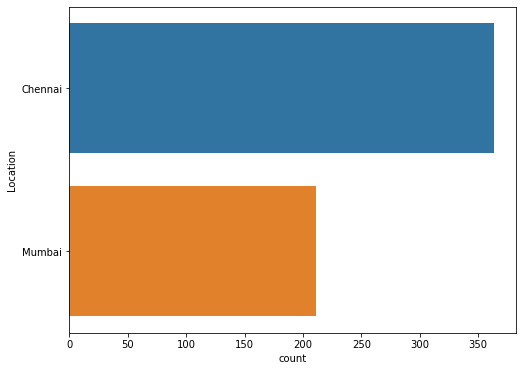

In [41]:
#Creating a plot that counts the totla number of Real Estate data collected for every location
plt.figure(figsize = (8,6))
sns.countplot(y=df.Location)
plt.savefig('plot1n .png', dpi = 1000)

## What is the total count of Flat and Villa in the dataset ?

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Type', ylabel='count'>

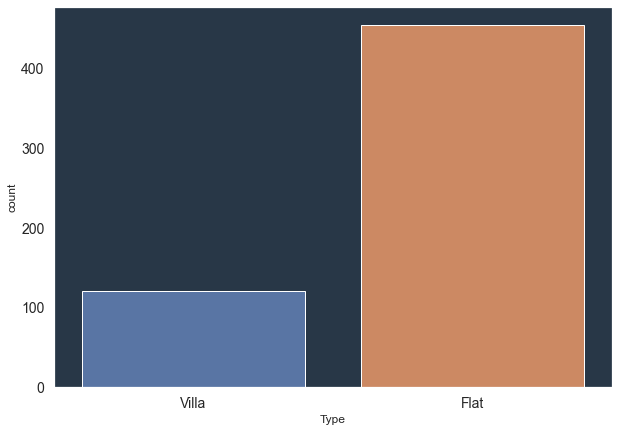

<Figure size 432x288 with 0 Axes>

In [42]:
#Creating a custom seaborn plot(template) to count the No of Real Estate of different Type
plt.figure(figsize=(10,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.countplot(df.Type, order=df.Type.value_counts(ascending = True).index)
plt.show()
plt.savefig('plot4.png', dpi = 1000)

## Plots to determine Outliers
<ul>
    <li>Box Plot</li>
    <li>Density Plot</li>
</ul>

## 1. Box Plot

## What are the Inter Quartile Range of Price of both RealEstate ?

<Figure size 660x440 with 0 Axes>

Text(0.5, 1.0, 'Chennai')

<AxesSubplot:title={'center':'Chennai'}, xlabel='Price_Lac'>

<Figure size 660x440 with 0 Axes>

Text(0.5, 1.0, 'Mumbai')

<AxesSubplot:title={'center':'Mumbai'}, xlabel='Price_Lac'>

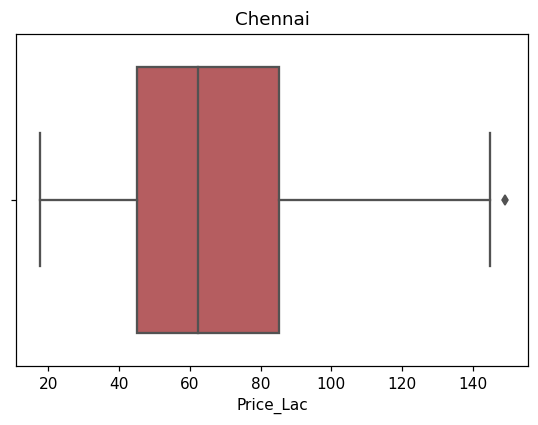

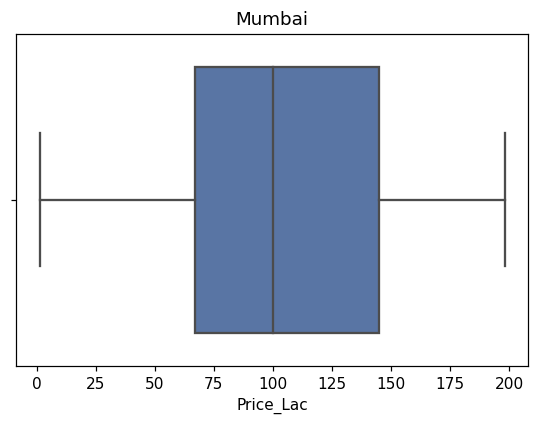

In [43]:
#Reseting the seaborn settings from custom to default
sns.reset_orig()
# Creating a boxplot to verify where most of the collected Real Estate price i.e. Scraped
plt.figure(dpi = 110)
plt.title(City[0])
sns.boxplot(data = df[df.Location==City[0]],x ='Price_Lac',color='r')
plt.figure(dpi = 110)
plt.title(City[1])
sns.boxplot(data = df[df.Location==City[1]],x ='Price_Lac',color='b')
plt.savefig('plot6.png', dpi = 1000)

## 2. Density Plot

<Figure size 660x440 with 0 Axes>

<AxesSubplot:xlabel='Price_Lac', ylabel='Density'>

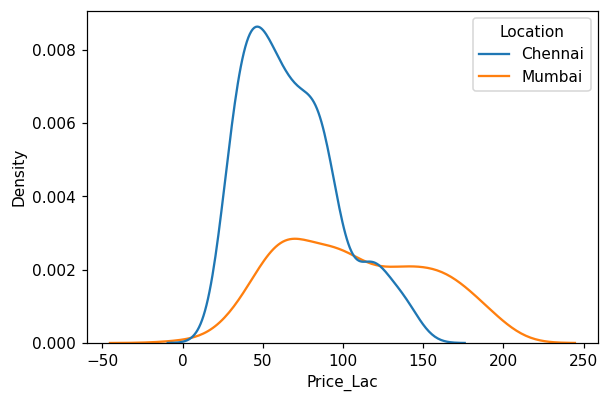

In [44]:
# Density plot for the same purpose as before
plt.figure(dpi = 110)
sns.kdeplot(data = df,x ='Price_Lac',hue='Location')
plt.savefig('plot7.png', dpi = 1000)

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fd78a83df10>,
 [Text(0.13488478963123118, 1.091698719210634, '2.0'),
  Text(-0.8570625835757864, -0.6895242764648671, '3.0'),
  Text(0.7240557326339653, -0.8280961876738063, '1.0'),
  Text(1.0940783235965807, -0.11398518252867691, '4.0'),
  Text(1.0997373163358684, -0.024038199982165578, '5.0')],
 [Text(0.07357352161703518, 0.5954720286603458, '46.09%'),
  Text(-0.4674886819504288, -0.3761041507990184, '29.39%'),
  Text(0.3949394905276174, -0.4516888296402579, '21.91%'),
  Text(0.596769994689044, -0.062173735924732854, '1.91%'),
  Text(0.5998567180013826, -0.013111745444817587, '0.70%')])

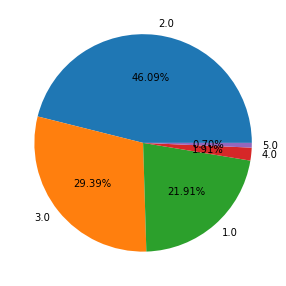

In [45]:
plt.figure(figsize = (5,5))
plt.pie(df.BHK.value_counts(), labels = df.BHK.value_counts().index, autopct = '%.2f%%')
plt.savefig('plot10.png', dpi = 1000)

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fd78b3b9220>,
 [Text(-0.3399187721714582, 1.046162142464278, 'New Property'),
  Text(0.3399188701202255, -1.0461621106387813, 'Old Property')],
 [Text(-0.18541023936624992, 0.5706338958896061, '60.00%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.00%')])

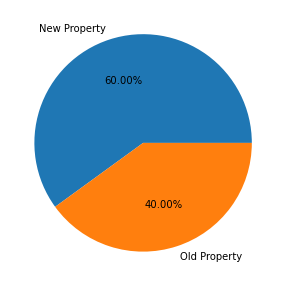

In [46]:
plt.figure(figsize = (5,5))
plt.pie(df.Transaction.value_counts(), labels = df.Transaction.value_counts().index, autopct = '%.2f%%')
plt.savefig('plot10.png', dpi = 1000)

## II. Bivariate Analysis

## What is the mean Price to buy Real Estate in both cities ?

<Figure size 660x440 with 0 Axes>

<AxesSubplot:xlabel='Price_Lac', ylabel='Location'>

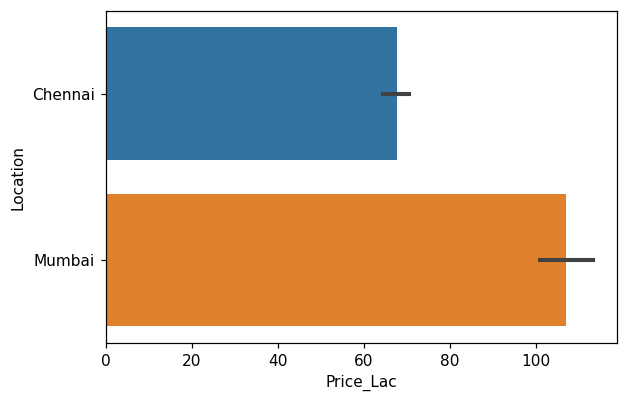

In [47]:
#Creating a barplot that shows the mean Price of Real Estate of various Locations
plt.figure(dpi = 110)
sns.barplot(y = df.Location,x= df.Price_Lac)
plt.savefig('plot5.png', dpi = 1000)

## How is the Flat Price compared between two cities ?

In [48]:
a = df[df.BHK==2.0]

<Figure size 660x440 with 0 Axes>

Text(0.5, 1.0, 'Chennai/Mumbai')

<AxesSubplot:title={'center':'Chennai/Mumbai'}, xlabel='Area_Sqft', ylabel='Price_Lac'>

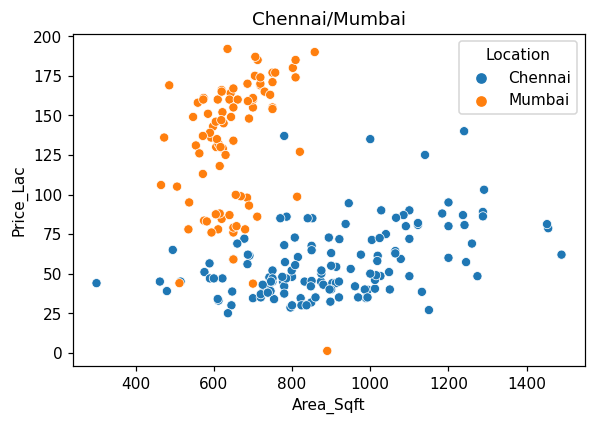

In [49]:
# Create Plot between Location and Price/Sqft for different Type of Real estate
plt.figure(dpi = 110)
plt.title(City[0]+'/'+City[1])
sns.scatterplot(a[a.Type=='Flat'].Area_Sqft,a[a.Type=='Flat'].Price_Lac, hue = a[a.Type=='Flat'].Location)
plt.savefig('plot8.png', dpi = 1000)

## Demonstrating it in violin plot

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:xlabel='Type', ylabel='Price_Lac'>

(array([0, 1]), [Text(0, 0, 'Flat'), Text(1, 0, 'Villa')])

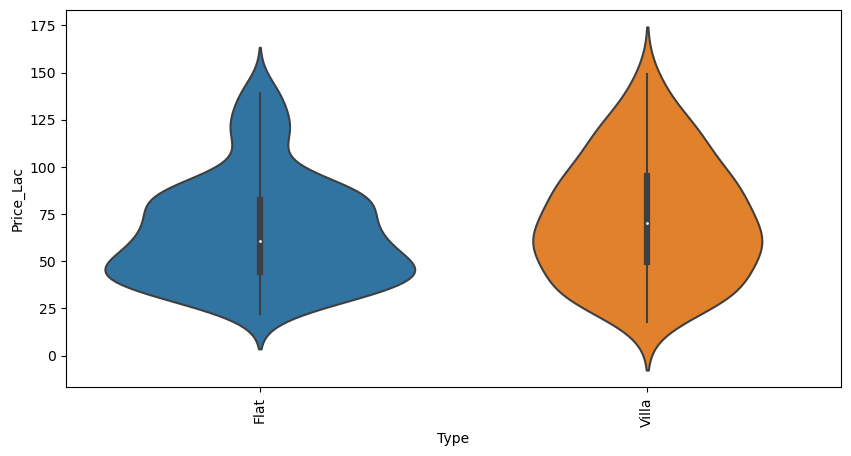

In [50]:
#Create violin plot for different Location for Price/Sqft
plt.figure(figsize=(10,5),dpi=100)
sns.violinplot(y=df['Price_Lac'],x=df[df.Location==City[0]].Type)
plt.xticks(rotation=90)
plt.savefig('plot11.png', dpi = 1000)

## How much does New Property cost in both cities comparatively ?

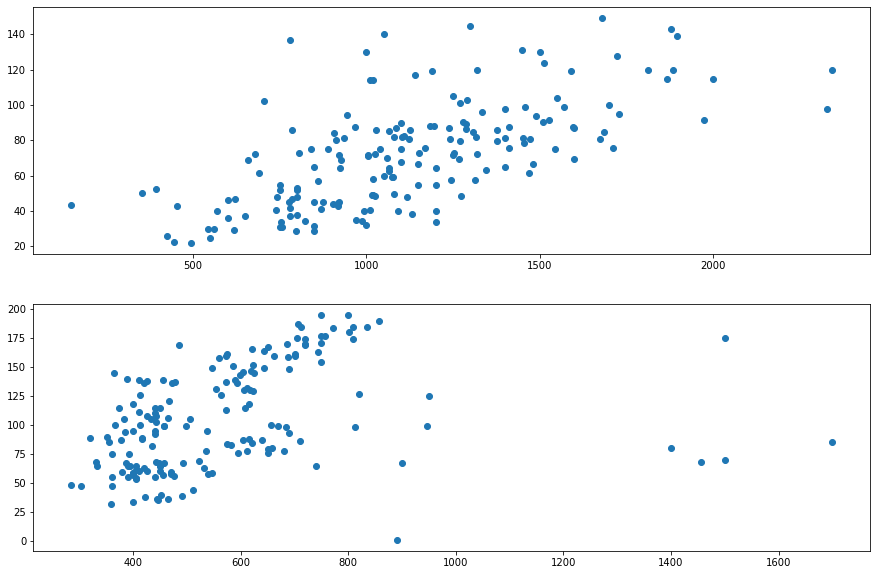

In [51]:
fig,plots = plt.subplots(2,1,figsize=(15,10))
city1tran = df[df.Location==City[0]][df[df.Location==City[0]].Transaction=='New Property']
city2tran = df[df.Location==City[1]][df[df.Location==City[1]].Transaction=='New Property']
plots[0].scatter(city1tran.Area_Sqft,city1tran['Price_Lac'])
plots[1].scatter(city2tran.Area_Sqft,city2tran['Price_Lac'])

## How much does Villa cost in both the cities ? also find an approx. evaluation for new data !

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

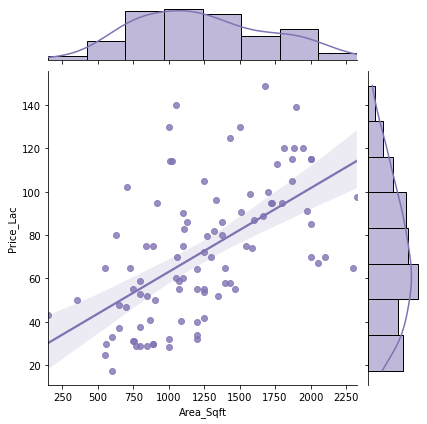

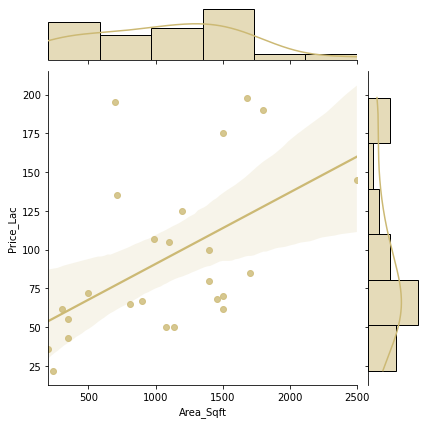

In [52]:
#Show an increase in Price/Sqft with increace in
plt.figure(figsize=(10,6))
city1type = df[df.Location==City[0]][df[df.Location==City[0]].Type =='Villa']
city2type = df[df.Location==City[1]][df[df.Location==City[1]].Type =='Villa']
# chensqft
# bangsqft
sns.jointplot(city1type.Area_Sqft,city1type['Price_Lac'],color='m',kind = 'reg')
sns.jointplot(city2type.Area_Sqft,city2type['Price_Lac'],color='y',kind = 'reg')
plt.savefig('plot13.png', dpi = 1000)

<Figure size 1008x504 with 0 Axes>

Text(0.5, 1.0, 'Chennai')

<AxesSubplot:title={'center':'Chennai'}, xlabel='BHK', ylabel='Price_Lac'>

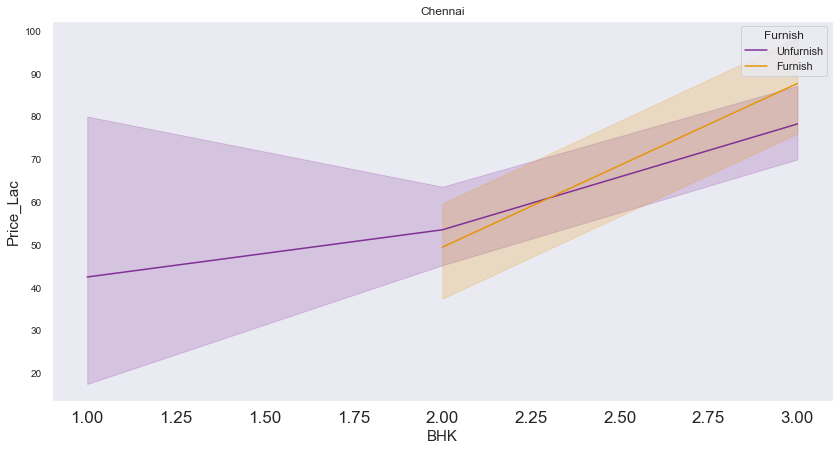

<Figure size 432x288 with 0 Axes>

In [53]:
#Create a custom seaborn plot between the Price/Sqft and Sqft for different Type of RealEstate
plt.figure(figsize=(14,7))
sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":False})
plt.title(City[0])
sns.lineplot(x='BHK' , y='Price_Lac',hue='Furnish', data = city1type[city1type.BHK<4.0],dashes = False,palette = 'CMRmap')
plt.show()
plt.savefig('plot12.png', dpi = 1000)

In [54]:
df[df.BHK==4][df[df.BHK==4].Type=='Villa']

,Location,Area,Type,BHK,Furnish,Transaction,Status,Price_Lac,Area_Sqft,Price/Sqft,SS
272,Chennai,inPerumbakkam,Villa,4.0,Unfurnish,New Property,Dec 2022,120.0,1884.0,6369.00,True
273,Chennai,inKelambakkam Old Mahabalipuram Road,Villa,4.0,Unfurnish,New Property,Dec 2021,115.0,1866.0,6162.00,False
283,Chennai,inKelambakkam Old Mahabalipuram Road,Villa,4.0,Unfurnish,New Property,Dec 2021,139.0,1896.0,7013.00,False
337,Chennai,inKolapakkam Vandalur Kelambakkam Road,Villa,4.0,Furnish,Old Property,Dec 2021,89.0,1668.0,5335.73,False
357,Chennai,inThalambur,Villa,4.0,Furnish,Old Property,Dec 2021,115.0,2000.0,5750.00,False
359,Chennai,inIyyappanthangal,Villa,4.0,Furnish,New Property,Dec 2021,130.0,1000.0,13000.00,False
550,Mumbai,inChikhal Dongari,Villa,4.0,Furnish,New Property,May 2022,85.0,1700.0,5000.00,False
552,Mumbai,inVasai West,Villa,4.0,Furnish,Old Property,Dec 2021,198.0,1681.0,11778.70,False
571,Mumbai,inBolinj,Villa,4.0,Furnish,Old Property,Dec 2021,145.0,2500.0,5800.00,False


## III. Multivariate Analysis

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

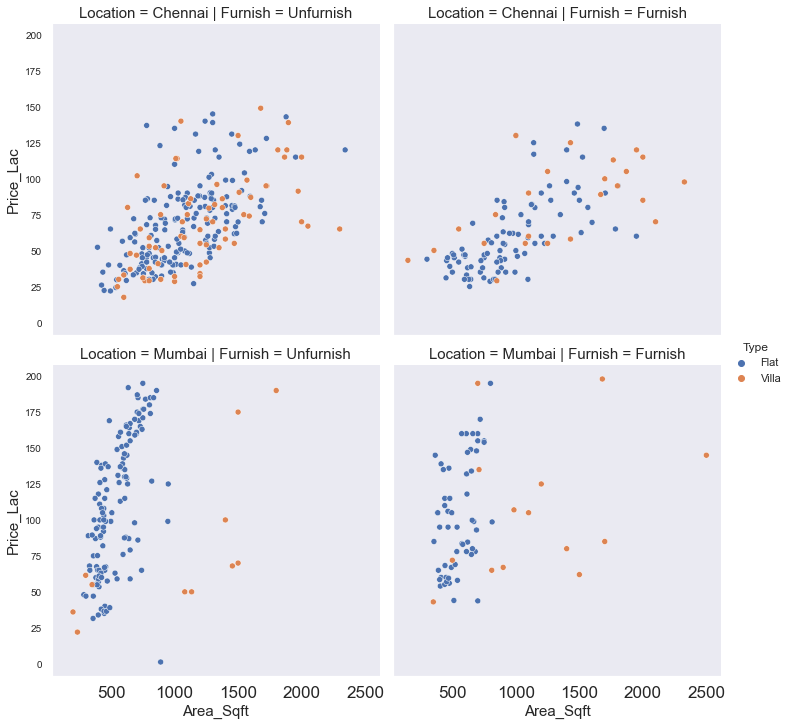

In [55]:
# Create a rich plot with information of Location, Furnish, and Type of the Real Estate data
plt.figure()
sns.relplot(x = 'Area_Sqft', y = 'Price_Lac', data = df, kind = 'scatter', col = 'Furnish',row = 'Location', hue = 'Type')
plt.savefig('plot14.png', dpi = 1000)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'BHK'),
  Text(1.5, 0, 'Price_Lac'),
  Text(2.5, 0, 'Area_Sqft'),
  Text(3.5, 0, 'Price/Sqft'),
  Text(4.5, 0, 'SS')])

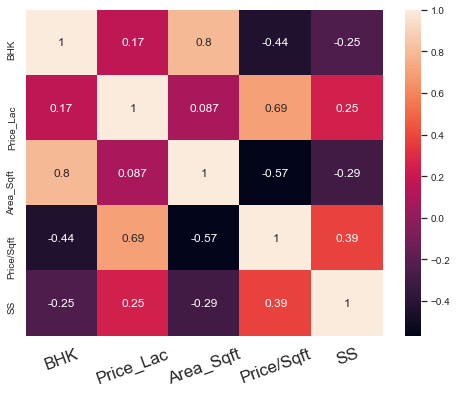

In [56]:
plt.figure(figsize = (8,6))
corela = df.corr()
sns.heatmap(corela,annot=True)
plt.xticks(rotation=20)
plt.savefig('plot15.png',dpi=1000)

# Outliers Determination

## Calculate the z-score

In [57]:
zscore = []
sq = df[df.Type=='Flat'][df[df.Type=='Flat'].Location ==City[0]].Area_Sqft
zscore.append(abs((sq - sq.mean())/sq.std()))
zscore

[0      0.192693
 1      1.440572
 2      0.700315
 3      0.024684
 4      0.386000
          ...   
 263    0.870692
 264    1.716699
 265    1.129194
 266    0.541689
 267    0.838949
 Name: Area_Sqft, Length: 268, dtype: float64]

In [58]:
df.describe()

,BHK,Price_Lac,Area_Sqft,Price/Sqft
count,575.000000,575.000000,575.000000,575.000000
mean,2.133913,81.949739,911.714783,11027.618070
std,0.797086,40.539880,424.965486,7735.847973
min,1.000000,1.200000,150.000000,134.830000
25%,2.000000,50.000000,591.500000,5383.810000
50%,2.000000,72.600000,824.000000,7556.270000
75%,3.000000,105.000000,1198.000000,14550.590000
max,5.000000,198.000000,2500.000000,39726.030000


# Summary

<ul>
    <li>The objective of the project is achieved</li>
    <li>User was able to successfully find insights by comapring the two datasets</li>
    <li>Between Chennai and Mumbai, Mumbai is more expensive to buy </li>
    <li>Between Chennai and Bangalore data did not drastically change</li>
    <li>Similarly, various Real Estate locaations can be compared</li>
</ul>